# Predict North America Sales and Evaluate Regression model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('vgsales.csv', sep=',')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Format the correlation matrix to set precision
formatted_correlation = correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

# Display the formatted correlation matrix
formatted_correlation

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.00,0.18,-0.40,-0.38,-0.27,-0.33,-0.43
Year,0.18,1.00,-0.09,0.01,-0.17,0.04,-0.07
NA_Sales,-0.40,-0.09,1.00,0.77,0.45,0.63,0.94
EU_Sales,-0.38,0.01,0.77,1.00,0.44,0.73,0.90
JP_Sales,-0.27,-0.17,0.45,0.44,1.00,0.29,0.61
Other_Sales,-0.33,0.04,0.63,0.73,0.29,1.00,0.75
Global_Sales,-0.43,-0.07,0.94,0.90,0.61,0.75,1.00


In [14]:
# filter out input that has the highest correlation with NA_Sales
X = df[["EU_Sales"]] # (16597, 1) Matrix (Inputs)
y = df[["NA_Sales"]] # (16597, 1) Matrix (Outputs)
X.shape

(16598, 1)

In [15]:
# perform the regression using scikit-learn
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

theta_0 [0.08271625] theta_1 [[1.24070026]]


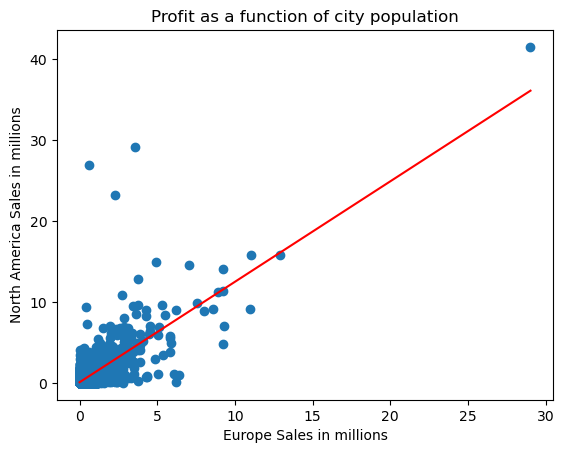

In [28]:
# the theta's
print('theta_0', regr.intercept_, 'theta_1', regr.coef_)

# perform prediction on the complete training set
pred = regr.predict(X)

# visualize how the model fits the training data
plt.scatter(X, y)
plt.plot(X, pred, color="red")
plt.xlabel('Europe Sales in millions')
plt.ylabel('North America Sales in millions')
plt.title('Profit as a function of city population')
plt.show()

## Watched https://www.youtube.com/watch?v=zMFdb__sUpw to understands RMSE better

## Biggest difference between MAE and RMSE:
- RMSE Takes the square of each difference between Prediction and Actual value
- This means large differences get punished more severely in RMSE
- Outliers will cause RMSE to become bigger than MAE

In [27]:
# Evaluate the model with different methods
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, pred)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y, pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.2738389551360345
Root Mean Squared Error (RMSE): 0.5232962403228544
Mean Absolute Error (MAE): 0.178044122743789
